# Configuration

In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Read packages

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import datasets, transforms
from torch.utils.data import DataLoader

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image


DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print("Device:", DEVICE)

import os
import sys

sys.path.append("..")

from src.data_utils import *
from src.cnn_models import *
from src.training_utils import *
from src.evaluation_utils import *

Device: cpu


## Read data-images

In [21]:
filename = "data_processing.ipynb"  # Name of current file
print(f"Current absolute path: {os.getcwd()}\n")

# We specify the path of the current directory and the data and output directories.
ACTUAL_DIR = os.path.dirname(os.path.abspath(filename))
BASE_DIR = os.path.dirname(ACTUAL_DIR)
DATA_DIR = os.path.join(BASE_DIR, "data")
IMG_DIR = os.path.join(DATA_DIR, "images")
OUTPUT_DIR = os.path.join(DATA_DIR, "output")

print(f"BASE_DIR: {BASE_DIR}")
print(f"DATA_DIR: {DATA_DIR}")
print(f"IMG_DIR: {IMG_DIR}")
print(f"OUTPUT_DIR: {OUTPUT_DIR}")

Current absolute path: /Users/jhonattan.reales/Library/Mobile Documents/com~apple~CloudDocs/MAESTRIA MIAA 2025-2026/Cursos semestres/SEMESTRE 2/Aprendizaje automatico IV/Competencia-CNN/Kaggle_CNN_competition_ML4_MIAA/notebooks

BASE_DIR: /Users/jhonattan.reales/Library/Mobile Documents/com~apple~CloudDocs/MAESTRIA MIAA 2025-2026/Cursos semestres/SEMESTRE 2/Aprendizaje automatico IV/Competencia-CNN/Kaggle_CNN_competition_ML4_MIAA
DATA_DIR: /Users/jhonattan.reales/Library/Mobile Documents/com~apple~CloudDocs/MAESTRIA MIAA 2025-2026/Cursos semestres/SEMESTRE 2/Aprendizaje automatico IV/Competencia-CNN/Kaggle_CNN_competition_ML4_MIAA/data
IMG_DIR: /Users/jhonattan.reales/Library/Mobile Documents/com~apple~CloudDocs/MAESTRIA MIAA 2025-2026/Cursos semestres/SEMESTRE 2/Aprendizaje automatico IV/Competencia-CNN/Kaggle_CNN_competition_ML4_MIAA/data/images
OUTPUT_DIR: /Users/jhonattan.reales/Library/Mobile Documents/com~apple~CloudDocs/MAESTRIA MIAA 2025-2026/Cursos semestres/SEMESTRE 2/Aprendi

In [22]:
# Read the CSV file
csv_file = os.path.join(DATA_DIR, "train.csv")
df_train = pd.read_csv(csv_file)
df_train.head()

,filename,class,xmin,ymin,xmax,ymax
0,video_CDC-YOUTUBE_mp4-63_jpg.rf.2f4f64f6ef712f...,no-mask,315,249,468,374
1,IMG_4860_mp4-36_jpg.rf.01a053cabddff2cdd19f04e...,no-mask,257,237,299,264
2,IMG_1491_mp4-12_jpg.rf.9df64033aebef44b8bb9a6a...,mask,291,245,582,449
3,IMG_4861_mp4-64_jpg.rf.74ab6d1da8a1fa9b8fbb576...,no-mask,231,229,577,420
4,IMG_9950-1-_mp4-83_jpg.rf.74dca33810c23ba144d8...,no-mask,107,168,515,469


## Images EDA

In [187]:
df_train.filename.nunique(), df_train.shape

(219, (219, 6))

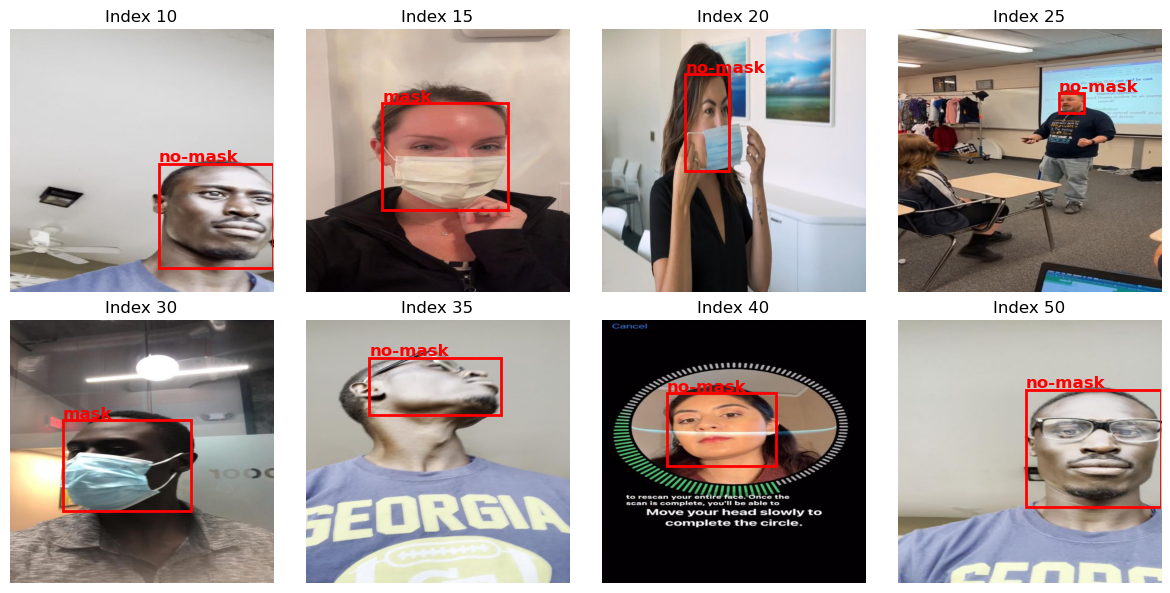

In [ ]:
show_raw_images_with_bboxes(df_train, [10, 15, 20, 25, 30, 35, 40, 50], IMG_DIR, cols=4)

In [ ]:
# Compute the mean and std per channel (R, G, B) across all training images
mean_images, std_images = compute_mean_std_image_dir(
    IMG_DIR, df_train["filename"].tolist()
)

# Create the dataset with personalized normalization
dataset = MaskDataset(
    df=df_train,
    images_dir=IMG_DIR,
    img_size=256,
    personalized_norm=True,
    custom_mean=mean_images,
    custom_std=std_images,
)
img, box, cls, fname = dataset[1]

print(img.shape)
print(box)
print(cls)
print(fname)

torch.Size([3, 256, 256])
tensor([0.4016, 0.3703, 0.4672, 0.4125])
tensor([0.])
IMG_4860_mp4-36_jpg.rf.01a053cabddff2cdd19f04e149251dca.jpg


In [2]:
# train_dataset = MaskDataset(
#     df=df_train,
#     images_dir=IMG_DIR,
#     img_size=img_size,
#     personalized_norm=True,
#     custom_mean=mean_train_images,
#     custom_std=std_train_images,
# )

# aug_train_dataset = AugmentedDataset(train_dataset, aug=aug_strong)

# # Visualize the augmented image and bounding box
# show_dataset_sample(aug_train_dataset, 10, class_map=LABEL_TO_CLASS)